In [3]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

#Libraries from Sci-kit Learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
#SVM
from sklearn.svm import SVR

In [4]:
boston = pd.read_csv('train.csv')
boston_test = pd.read_csv('test.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [5]:
boston_test = boston_test.drop(['ID'],axis=1)
boston_test.shape
boston_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [6]:
housing_prices = boston['MEDV']
housing_features = boston.drop(['MEDV'],axis=1)
housing_features = housing_features.drop(['ID'],axis=1)

housing_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     400 non-null    float64
 1   ZN       400 non-null    float64
 2   INDUS    400 non-null    float64
 3   CHAS     400 non-null    int64  
 4   NOX      400 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      400 non-null    float64
 7   DIS      400 non-null    float64
 8   RAD      400 non-null    int64  
 9   TAX      400 non-null    float64
 10  PTRATIO  400 non-null    float64
 11  B        400 non-null    float64
 12  LSTAT    400 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 40.8 KB


In [7]:
boston.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [8]:
housing_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28
1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21
2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59
3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59
4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

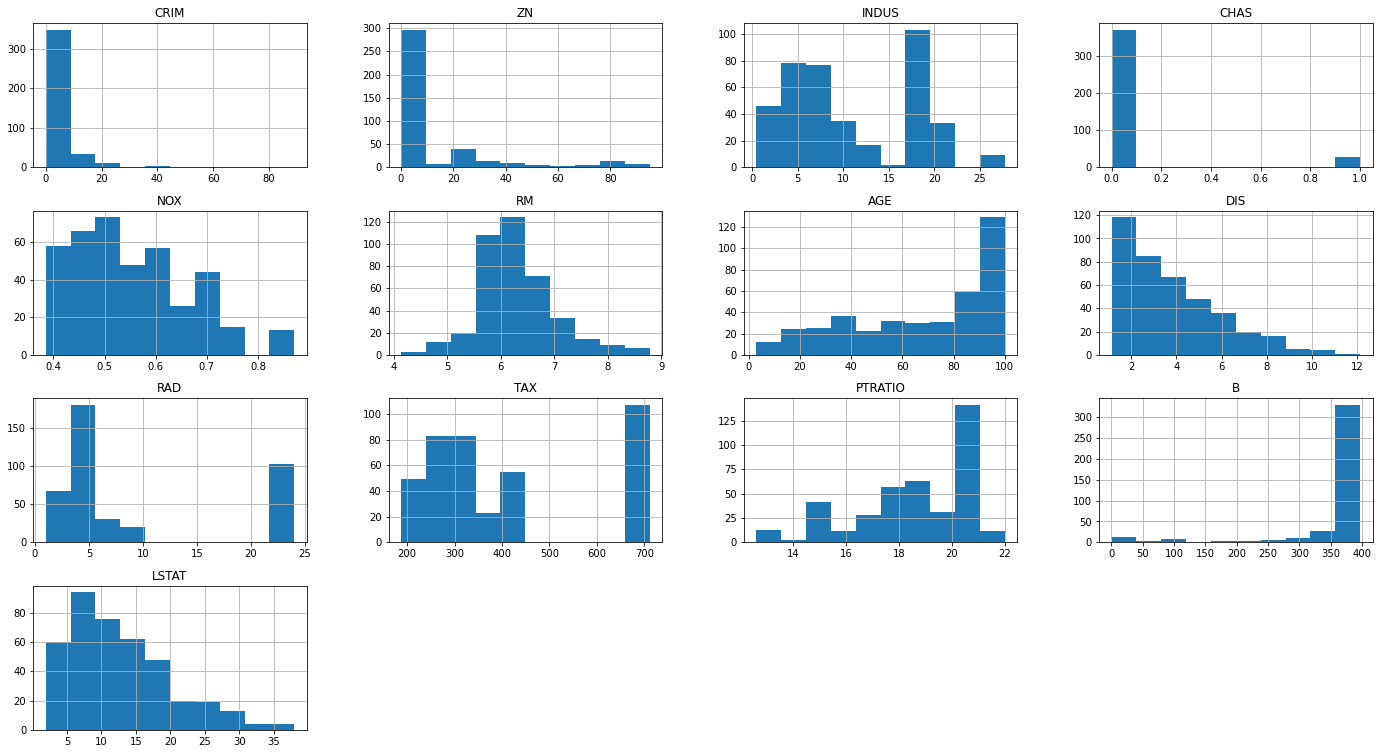

In [9]:
housing_features.hist(figsize=(24,13))

In [10]:
housing_features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525
std,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000
50%,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
corr =housing_features.corr()

In [12]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.193548,0.409972,-0.060591,0.422635,-0.205928,0.353379,-0.376323,0.618538,0.577501,0.284967,-0.357581,0.442743
ZN,-0.193548,1.000000,-0.522218,-0.037318,-0.497638,0.290127,-0.554214,0.659949,-0.301067,-0.300221,-0.369974,0.161515,-0.402116
INDUS,0.409972,-0.522218,1.000000,0.075305,0.759132,-0.396865,0.631742,-0.695199,0.608088,0.731619,0.370383,-0.338007,0.624374
CHAS,-0.060591,-0.037318,0.075305,1.000000,0.084020,0.091267,0.083314,-0.102016,-0.023792,-0.045183,-0.137556,0.040732,-0.055326
NOX,0.422635,-0.497638,0.759132,0.084020,1.000000,-0.283907,0.736349,-0.768775,0.602960,0.657875,0.154693,-0.382202,0.622209
RM,-0.205928,0.290127,-0.396865,0.091267,-0.283907,1.000000,-0.198918,0.171596,-0.190030,-0.277064,-0.336408,0.120518,-0.634758
AGE,0.353379,-0.554214,0.631742,0.083314,0.736349,-0.198918,1.000000,-0.750408,0.457339,0.499478,0.234894,-0.274650,0.593788
DIS,-0.376323,0.659949,-0.695199,-0.102016,-0.768775,0.171596,-0.750408,1.000000,-0.492090,-0.520442,-0.185938,0.274036,-0.503383
RAD,0.618538,-0.301067,0.608088,-0.023792,0.602960,-0.190030,0.457339,-0.492090,1.000000,0.911103,0.458930,-0.395845,0.503532
TAX,0.577501,-0.300221,0.731619,-0.045183,0.657875,-0.277064,0.499478,-0.520442,0.911103,1.000000,0.450978,-0.400353,0.552239


C:\Users\bonthu.rohitha\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

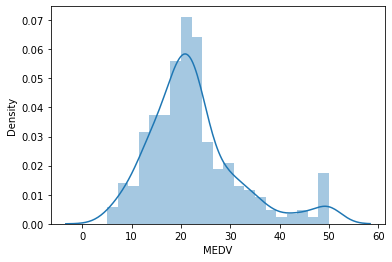

In [13]:
sns.distplot(boston['MEDV'])

C:\Users\bonthu.rohitha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

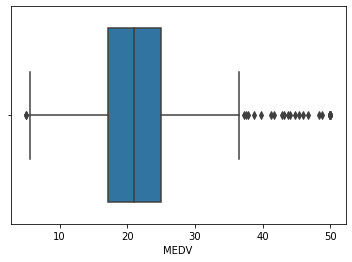

In [14]:
sns.boxplot(boston.MEDV)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(housing_features, housing_prices, test_size = 0.3, random_state = 25)

In [16]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 13)
Shape of X_test:  (120, 13)
Shape of y_train:  (280,)
Shape of y_test (120,)


In [17]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7064553081536112
R2_score (train):  0.7561004167830085
R2_score (test):  0.7045329159671025
RMSE:  4.607508809191707
